<a href="https://colab.research.google.com/github/nooYeaT/NLP/blob/main/%EB%84%A4%EC%9D%B4%EB%B2%84%EC%87%BC%ED%95%91%EB%A6%AC%EB%B7%B0%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from collections import Counter
from konlpy.tag import Mecab
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/bab2min/corpus/master/sentiment/naver_shopping.txt", filename="ratings_total.txt")

('ratings_total.txt', <http.client.HTTPMessage at 0x7bd286e3e2f0>)

In [ ]:
total_data=pd.read_table('ratings_total.txt',names=['ratings','reviews'])
len(total_data)

200000

In [ ]:
total_data[:5]

,ratings,reviews
0,5,배공빠르고 굿
1,2,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고
2,5,아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...
3,2,선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전...
4,5,민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ


In [ ]:
total_data['label']=np.select([total_data.ratings>3],[1], default=0)
total_data[:5]

,ratings,reviews,label
0,5,배공빠르고 굿,1
1,2,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고,0
2,5,아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...,1
3,2,선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전...,0
4,5,민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ,1


In [ ]:
total_data['ratings'].nunique(), total_data['reviews'].nunique(), total_data['label'].nunique()

(4, 199908, 2)

In [ ]:
total_data.drop_duplicates(subset=['reviews'], inplace=True)
len(total_data)

199908

In [ ]:
total_data.isnull().values.any()

False

In [ ]:
train_data, test_data=train_test_split(total_data, test_size=0.25, random_state=42)
len(train_data)
len(test_data)

49977

<Axes: xlabel='label'>

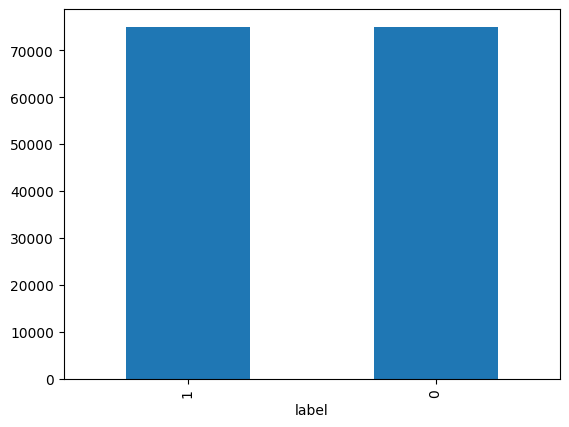

In [ ]:
train_data['label'].value_counts().plot(kind='bar')

In [ ]:
train_data.groupby('label').size().reset_index(name='count')

,label,count
0,0,74918
1,1,75013


In [ ]:
train_data['reviews']=train_data['reviews'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣] ','', regex=True)
train_data['reviews'].replace('', np.nan, inplace=True)
train_data.isnull().sum()

<ipython-input-13-3cd2bb229567>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['reviews'].replace('', np.nan, inplace=True)


,0
ratings,0
reviews,0
label,0


In [ ]:
test_data.drop_duplicates(subset = ['reviews'], inplace=True) # 중복 제거
test_data['reviews'] = test_data['reviews'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","", regex=True) # 정규 표현식 수행
test_data['reviews'].replace('', np.nan, inplace=True) # 공백은 Null 값으로 변경
test_data = test_data.dropna(how='any') # Null 값 제거
print('전처리 후 테스트용 샘플의 개수 :',len(test_data))

전처리 후 테스트용 샘플의 개수 : 49977


<ipython-input-15-99b587826383>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_data['reviews'].replace('', np.nan, inplace=True) # 공백은 Null 값으로 변경


In [ ]:
mecab=Mecab()
mecab.morphs('와 이런 것도 상품이라고 차라리 내가 만드는 게 나을 뻔')

['와',
 '이런',
 '것',
 '도',
 '상품',
 '이',
 '라고',
 '차라리',
 '내',
 '가',
 '만드',
 '는',
 '게',
 '나을',
 '뻔']

In [ ]:
stopwords = ['도', '는', '다', '의', '가', '이', '은', '한', '에', '하', '고', '을', '를', '인', '듯', '과', '와', '네', '들', '듯', '지', '임', '게']

In [ ]:
train_data['tokenized']=train_data['reviews'].apply(mecab.morphs)
train_data['tokenized']=train_data['tokenized'].apply(lambda x:[item for item in x if item not in stopwords])

In [ ]:
test_data['tokenized'] = test_data['reviews'].apply(mecab.morphs)
test_data['tokenized'] = test_data['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])

In [ ]:
negative_words=np.hstack(train_data[train_data.label==0]['tokenized'].values)
positive_words=np.hstack(train_data[train_data.label==1]['tokenized'].values)

In [ ]:
negative_word_count=Counter(negative_words)

In [ ]:
print(negative_word_count.most_common(20))

[('.', 54967), ('네요', 31738), ('는데', 20229), ('안', 19731), ('어요', 15095), ('있', 13201), ('너무', 12983), ('했', 11885), ('좋', 9801), ('배송', 9673), ('같', 9004), ('어', 8968), ('거', 8867), ('구매', 8867), ('없', 8674), ('아요', 8620), ('습니다', 8429), ('그냥', 8353), ('되', 8346), ('잘', 8020)]


In [ ]:
positive_word_count = Counter(positive_words)
print(positive_word_count.most_common(20))

[('좋', 39438), ('아요', 21107), ('네요', 19783), ('.', 19403), ('어요', 19115), ('잘', 18598), ('구매', 16153), ('습니다', 13319), ('있', 12389), ('배송', 12258), ('는데', 11660), ('했', 10158), ('합니다', 9808), ('먹', 9642), ('재', 9258), ('너무', 8388), ('!', 8339), ('같', 7866), ('만족', 7246), ('~', 6940)]


긍정 리뷰의 평균 길이 : 14.391118872728727
부정 리뷰의 평균 길이 : 18.350836915027095


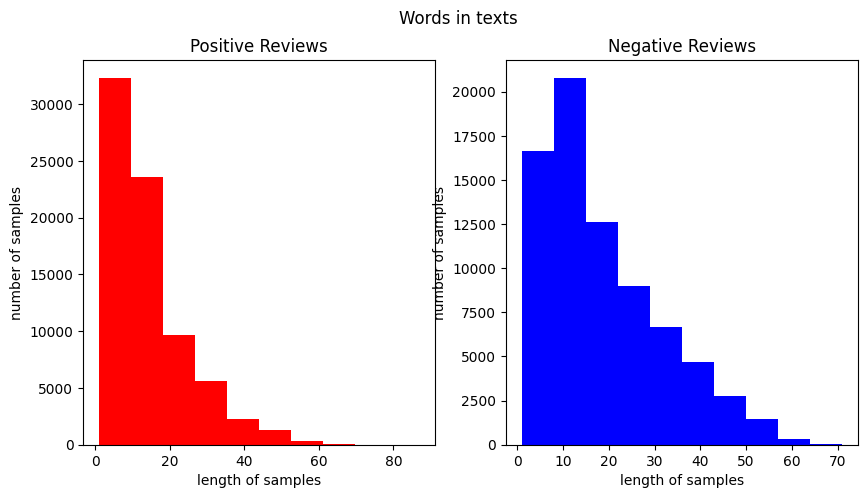

In [ ]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
text_len = train_data[train_data['label']==1]['tokenized'].map(lambda x: len(x))
ax1.hist(text_len, color='red')
ax1.set_title('Positive Reviews')
ax1.set_xlabel('length of samples')
ax1.set_ylabel('number of samples')
print('긍정 리뷰의 평균 길이 :', np.mean(text_len))

text_len = train_data[train_data['label']==0]['tokenized'].map(lambda x: len(x))
ax2.hist(text_len, color='blue')
ax2.set_title('Negative Reviews')
fig.suptitle('Words in texts')
ax2.set_xlabel('length of samples')
ax2.set_ylabel('number of samples')
print('부정 리뷰의 평균 길이 :', np.mean(text_len))
plt.show()

In [ ]:
X_train = train_data['tokenized'].values
y_train = train_data['label'].values
X_test= test_data['tokenized'].values
y_test = test_data['label'].values

In [ ]:
tokenizer=Tokenizer()
tokenizer.fit_on_texts(X_train)

In [ ]:
threshold=2
total_cnt=len(tokenizer.word_index)
rare_cnt=0
total_freq=0
rare_freq=0

for key, value in tokenizer.word_counts.items():
  total_freq+=value
  if value<threshold:
    rare_cnt+=1
    rare_freq+=value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 43031
등장 빈도가 1번 이하인 희귀 단어의 수: 20236
단어 집합에서 희귀 단어의 비율: 47.02656224582278
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 0.8245023385210378


In [ ]:
vocab_size=total_cnt-rare_cnt+2
vocab_size

22797

In [ ]:
tokenizer=Tokenizer(vocab_size, oov_token='OOV')
tokenizer.fit_on_texts(X_train)
X_train=tokenizer.texts_to_sequences(X_train)
X_test=tokenizer.texts_to_sequences(X_test)

print(X_train[:3])

[[71, 147, 2062, 315, 14826, 276, 77, 7, 251, 180, 146, 834, 3038, 658, 3, 83, 67, 218, 42, 1398, 167, 4, 7], [509, 2760, 2, 8838, 2734, 2, 2511, 352, 3039, 266, 2438, 39, 493, 3], [48, 25, 868, 102, 36, 2421, 172, 8, 11, 8366, 5, 1369, 31, 149, 336, 45, 63, 172, 149, 8, 1977, 3, 2, 2, 118, 174, 1437, 302, 2, 2, 128, 144, 2, 6476]]


87
16.36972340610014


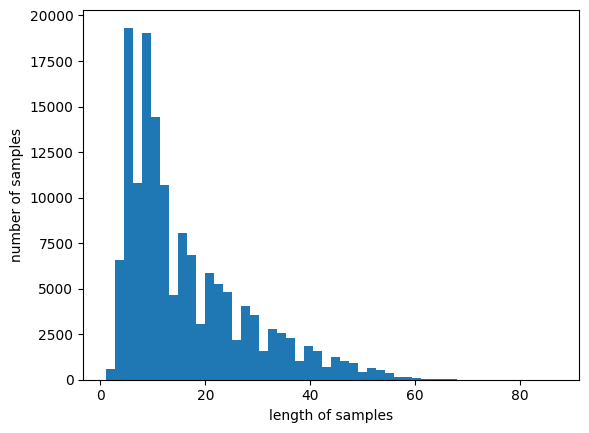

In [ ]:
print(max((len(review) for review in X_train)))
print(sum(map(len, X_train))/len(X_train))
plt.hist([len(review) for review in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [ ]:
def below_threshold_len(max_len, nested_list):
  count=0
  for sentence in nested_list:
    if len(sentence)<=max_len:
      count+=1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (count / len(nested_list))*100))

In [ ]:
max_len=80
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 80 이하인 샘플의 비율: 99.99866605305107


In [ ]:
X_train=pad_sequences(X_train, maxlen=max_len)
X_test=pad_sequences(X_test, maxlen=max_len)

In [ ]:
from tensorflow.keras.layers import Embedding, Dense, GRU
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

embedding_dim=100
hidden_units=128

model=Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(GRU(hidden_units))
model.add(Dense(1, activation='sigmoid'))

es=EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc=ModelCheckpoint('best_model.keras', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history=model.fit(X_train, y_train, batch_size=64, epochs=15, validation_split=0.2, callbacks=[es, mc])

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.8563 - loss: 0.3499
Epoch 1: val_acc improved from -inf to 0.91129, saving model to best_model.keras
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - acc: 0.8563 - loss: 0.3498 - val_acc: 0.9113 - val_loss: 0.2436
Epoch 2/15
1868/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.9197 - loss: 0.2255
Epoch 2: val_acc improved from 0.91129 to 0.92023, saving model to best_model.keras
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - acc: 0.9197 - loss: 0.2255 - val_acc: 0.9202 - val_loss: 0.2203
Epoch 3/15
1874/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.9296 - loss: 0.1990
Epoch 3: val_acc improved from 0.92023 to 0.92067, saving model to best_model.keras
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - acc: 0.9296 - loss: 0.1990 - val_acc: 0.9207 - val_loss: 0.2253
Epoch 4/15
1869/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.9351 - loss: 0.1860
Epoch 4: val_acc improved from 0.92067 to 0.92530, saving model to best_model.keras
1875/

In [ ]:
loaded_model=load_model('best_model.keras')
print(model.evaluate(X_test, y_test))

1562/1562 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - acc: 0.9135 - loss: 0.2412
[0.24309960007667542, 0.9139603972434998]


In [ ]:
def sentiment_predict(new_sentence):
  new_sentence = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣 ]','', new_sentence)
  new_sentence = mecab.morphs(new_sentence)
  new_sentence = [word for word in new_sentence if not word in stopwords]
  encoded = tokenizer.texts_to_sequences([new_sentence])
  pad_new = pad_sequences(encoded, maxlen = max_len)

  score = float(loaded_model.predict(pad_new))
  if(score > 0.5):
    print("{:.2f}% 확률로 긍정 리뷰입니다.".format(score * 100))
  else:
    print("{:.2f}% 확률로 부정 리뷰입니다.".format((1 - score) * 100))

In [ ]:
sentiment_predict('이 상품 진짜 좋아요... 저는 강추합니다. 대박')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
97.58% 확률로 긍정 리뷰입니다.


<ipython-input-59-918d698533ca>:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  score = float(loaded_model.predict(pad_new))


In [ ]:
sentiment_predict('진짜 배송도 늦고 개짜증나네요. 뭐 이런 걸 상품이라고 만듬?')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
99.70% 확률로 부정 리뷰입니다.


<ipython-input-59-918d698533ca>:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  score = float(loaded_model.predict(pad_new))


In [ ]:
sentiment_predict('판매자님... 너무 짱이에요.. 대박나삼')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
98.20% 확률로 긍정 리뷰입니다.


<ipython-input-59-918d698533ca>:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  score = float(loaded_model.predict(pad_new))


In [ ]:
sentiment_predict('ㅁㄴㅇㄻㄴㅇㄻㄴㅇ리뷰쓰기도 귀찮아')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
88.34% 확률로 부정 리뷰입니다.


<ipython-input-59-918d698533ca>:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  score = float(loaded_model.predict(pad_new))
